## Hoops and Stats: Unveiling the Secrets of NCAA Basketball Success

### By Daniel Lightner and Marcus Amerine

The College Basketball Dataset consists of statistics from NCAA Division I basketball teams across the 2013 to 2023 seasons, excluding the 2020 season, which was not played due to the Coronavirus pandemic. This dataset combines data from the 2013-2019 seasons and the 2021-2023 seasons. It includes a variety of performance metrics, such as adjusted offensive and defensive efficiency, shooting percentages, and wins. Analyzing this dataset allows us to uncover factors that contribute to a team's success in the NCAA tournament.

All of the variables within the cbb.csv file

- **TEAM**: The name of the Division I college basketball school.
- **CONF**: The Athletic Conference in which the school participates (e.g., ACC, Big Ten).
- **G**: Total number of games played by the team in the season.
- **W**: Total number of games won by the team in the season.
- **ADJOE**: Adjusted Offensive Efficiency; a measure of points scored per 100 possessions against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; a measure of points allowed per 100 possessions against average offenses. 
- **BARTHAG**: Power Rating indicating the team's chance of beating an average Division I team.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team.
- **EFG_D**: Effective Field Goal Percentage allowed by the team.
- **TOR**: Turnover Percentage Allowed; the rate at which opponents commit turnovers against the team.
- **TORD**: Turnover Percentage Committed; the rate at which the team commits turnovers.
- **ORB**: Offensive Rebound Rate; the percentage of available offensive rebounds secured by the team.
- **DRB**: Defensive Rebound Rate; the percentage of available defensive rebounds secured by the team.
- **FTR**: Free Throw Rate; the frequency with which the team shoots free throws per field goal attempt.
- **FTRD**: Free Throw Rate Allowed; the frequency with which opponents shoot free throws against the team.
- **2P_O**: Two-Point Shooting Percentage for shots taken by the team.
- **2P_D**: Two-Point Shooting Percentage allowed by the team.
- **3P_O**: Three-Point Shooting Percentage for shots taken by the team.
- **3P_D**: Three-Point Shooting Percentage allowed by the team.
- **ADJ_T**: Adjusted Tempo; an estimate of possessions per 40 minutes against average tempo.
- **WAB**: Wins Above Bubble; indicates how many wins above the cut-off for NCAA tournament qualification a team has.
- **POSTSEASON**: The round in which the team was eliminated in the NCAA tournament (e.g., R64, S16).
- **SEED**: The seed assigned to the team in the NCAA March Madness Tournament.
- **YEAR**: The season year of the data (e.g., 2021).


### Key Variables for Analysis - These variables are important because they will be explored further (either here or later).

- **ADJOE**: Adjusted Offensive Efficiency; helps evaluate a team's scoring capabilities against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; provides insight into how well a team prevents scoring against average offenses.
- **WAB**: Wins Above Bubble; indicates a team's performance relative to the NCAA tournament qualification threshold.

### Main ones for analysis above in this EDA



- **SEED**: The seed assigned to a team in the NCAA tournament, reflecting their perceived strength.
- **POSTSEASON**: The round where the team was eliminated, indicating tournament success.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team; a crucial metric for shooting efficiency.
- **3P_O**: Three-Point Shooting Percentage; important for understanding a team's ability to score from beyond the arc.
- **ADJ_T**: Adjusted Tempo; assesses the pace of play and how it may affect game outcomes.
- **BARTHAG**: Power Rating; offers a comparative measure of a team's strength against average Division I teams.
- **FTR**: Free Throw Rate; shows how often a team capitalizes on free throw opportunities, affecting overall scoring.

In [416]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('cbb.csv')

In [417]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

POSTSEASON    2843
SEED          2843
dtype: int64


In [418]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,...,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,680.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,...,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,8.801471,2017.828555
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,...,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,4.673461,3.257824
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,...,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,...,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,9.000000,2018.000000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,...,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,13.000000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2023.000000


In [419]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [420]:
df.select_dtypes(include=['number']).skew()

G         -1.272095
W          0.239642
ADJOE      0.190862
ADJDE     -0.040447
BARTHAG    0.141466
EFG_O     -0.000657
EFG_D     -0.003541
TOR        0.263764
TORD       0.369657
ORB       -0.059105
DRB        0.062284
FTR        0.270543
FTRD       0.495213
2P_O       0.098560
2P_D       0.018036
3P_O       0.024279
3P_D       0.032285
ADJ_T      0.163960
WAB        0.254546
SEED      -0.066725
YEAR       0.154283
dtype: float64

#### In this analysis, we will begin to look into the determining factors of Effective Field Goal Percentage for shots taken by the team. We will look into various models and influencing factors.

In [421]:
# Set label and features
y = df['EFG_O']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['EFG_O', "SEED", "EFG_D", "ADJDE", "TORD", "DRB", "BARTHAG", "2P_D", "ADJ_T", "3P_D", "FTRD"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  EFG_O   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 5.381e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:57:59   Log-Likelihood:                -84.833
No. Observations:                3523   AIC:                             191.7
Df Residuals:                    3512   BIC:                             259.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G             -0.0220      0.002    -10.640      0.0

### Let's look back at our assumptions

**Assumptions:**
* **Normality**: Omnibus and Jarque-Bera (safe: p-value *high*)
    * *Residuals* need to be normally distributed
    * p < 0.05 means **problem with normality**
* **Multicollinearity**: Are there strong relationships between any two variables, to the point where an increase/decrease in one will strongly affect the other?
    * *Condition Number (Cond. No.)*: safe: < 10, okay: < 30, but can go as high as 100 (**NOTE: VIFs are more reliable**)
    * *VIF:* below 3 (great), 5 (good), 10 (okay)
    * *Tolerance:* above 0.1 (good enough) or 0.2 (better) *(Some sources say cutoff should be 0.25)*
* **Autocorrelation**: How dependent are the variables on *time*? This is a whole other set of statistical analysis called *time series*
    * *Durban-Watson*: Safe between 1 and 2

### Off of this, we can tell that our has a problem with *Normality* and *Multicollinearity*

In [422]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Feature            VIF
0        G       3.832325
1        W      14.734108
2    ADJOE      16.973551
3      TOR       3.502490
4      ORB       3.038745
5      FTR       1.545903
6     2P_O       4.022113
7     3P_O       2.967366
8      WAB      13.583611
9     YEAR       1.717938
10   const  660610.926126


We can see the three variables (G, W, and WAB) are correlated - which makes sense as they are statistics pertaining the winning basketball games, not necessarrily towards our offensive field goal efficiency. I am also going to remove G, because its coefficient has 0 and barely impacts our model. As we take away some variables, other's become less significant, narrowing down our analysis.

In [423]:
# Set label and features
y = df['EFG_O']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['EFG_O', "SEED", "EFG_D", "ADJDE", "TORD", "DRB", "BARTHAG", "2P_D", "ADJ_T", "3P_D", "TOR", "FTRD", "ADJOE", "W", "WAB", "G", "YEAR"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  EFG_O   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.246e+05
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:57:59   Log-Likelihood:                -222.32
No. Observations:                3523   AIC:                             454.6
Df Residuals:                    3518   BIC:                             485.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ORB           -0.0074      0.001     -6.669      0.0

Let's begin to attempt to fix our normality

In [424]:
df_insample = pd.DataFrame({'Actual':df['EFG_O'], 
                            'Predicted':model.fittedvalues, 
                            'Residuals (Error)':df['EFG_O'] - model.fittedvalues})

df_insample.head(20)

,Actual,Predicted,Residuals (Error)
0,52.6,52.082283,0.517717
1,54.8,54.758641,0.041359
2,53.9,54.060349,-0.160349
3,53.5,53.520838,-0.020838
4,56.6,56.643723,-0.043723
5,49.9,49.775867,0.124133
6,54.6,54.637740,-0.037740
7,56.6,56.611290,-0.011290
8,55.2,54.935932,0.264068
9,51.7,51.719967,-0.019967


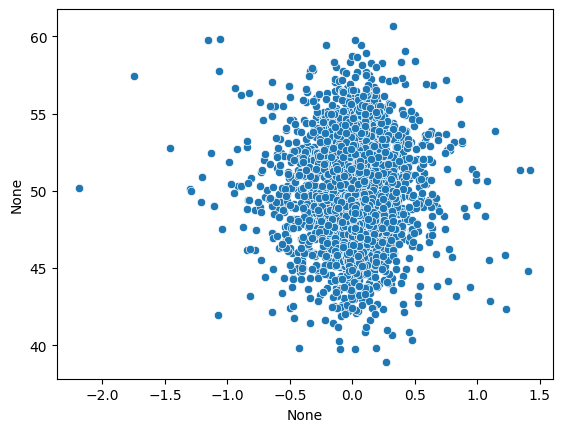

In [425]:
pred_val = model.fittedvalues.copy()
true_val = df['EFG_O'].values.copy()
residual = true_val - pred_val

ax = sns.scatterplot(x=residual, y=pred_val)

np.float64(0.9189528382019565)

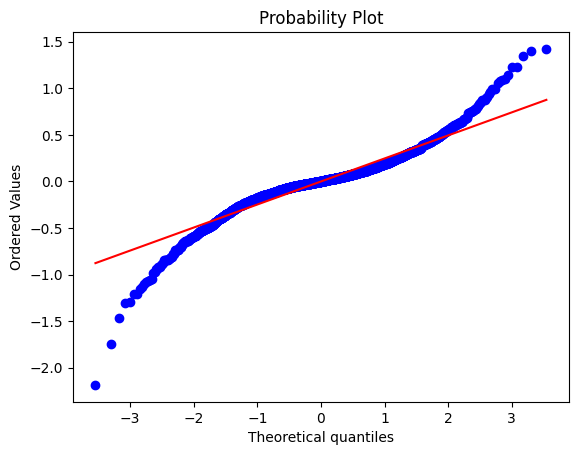

In [426]:
import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

There is a tailing off at the start and end our of probability plot.

In [427]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature         VIF
0     ORB    1.145085
1     FTR    1.129625
2    2P_O    1.179560
3    3P_O    1.181456
4   const  371.785069


##### This OLS regression model predicts Effective Field Goal Percentage (EFG_O) using four independent variables: Offensive Rebound Rate (ORB), Free Throw Rate (FTR), Two-Point Shooting Percentage (2P_O), and Three-Point Shooting Percentage (3P_O). The model has an R-squared of 0.993, indicating that it explains 99.3% of the variance in EFG_O, meaning the predictors are highly effective. Both 2P_O and 3P_O have strong positive effects on EFG_O, with 2P_O (coef = 0.6416) having a slightly stronger impact than 3P_O (coef = 0.5391). Interestingly, ORB and FTR have small negative coefficients, suggesting that teams with higher offensive rebounding or free throw rates tend to have slightly lower EFG_O, though the effect sizes are minimal.
##### All predictors are statistically significant (p < 0.05), meaning their relationships with EFG_O are unlikely due to chance. However, the Jarque-Bera test (p < 0.05) suggest that the residuals deviate from normality, which could impact inference. The Durbin-Watson statistic (2.020) indicates no strong autocorrelation in residuals. Finally, the condition number (1.45e+03) hints at possible multicollinearity, meaning some predictors may be highly correlated. Overall, while the model is highly predictive, it still has issues with normality.

#### To further evaluate our model, I analyzed the residuals and multicollinearity. A probability plot of residuals showed tailing off at both ends, suggesting deviations from normality. Examining residuals against actual and predicted values showed mostly small errors, but some variation remains. Checking for multicollinearity using Variance Inflation Factors (VIF) revealed that ORB, FTR, 2P_O, and 3P_O all had low VIF values (below 1.2), meaning minimal correlation among predictors. It should be noted too our F-statistic in this model is significantly higher than our first model with most of the variables.

## Now we'll look into TORD (Turnovers committed) and see if that statistic is influenced by others.

In [428]:
# Set label and features
y = df['TORD']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=["TORD", "SEED", "EFG_O", "BARTHAG"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                   TORD   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     608.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:58:00   Log-Likelihood:                -5420.0
No. Observations:                3523   AIC:                         1.088e+04
Df Residuals:                    3505   BIC:                         1.099e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G             -0.2456      0.010    -24.488      0.0

In [429]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Feature            VIF
0        G       4.332425
1        W      15.902284
2    ADJOE      17.903919
3    ADJDE       8.061157
4    EFG_D     225.329242
5      TOR       3.658572
6      ORB       3.187940
7      DRB       1.688410
8      FTR       1.714918
9     FTRD       1.556840
10    2P_O       4.168397
11    2P_D     124.677542
12    3P_O       3.146248
13    3P_D      47.513673
14   ADJ_T       1.166316
15     WAB      23.795438
16    YEAR       2.124065
17   const  817092.115309


Since our values of EFG_D, 2P_D, 3P_D are highly correlated, we'll remove a few and see where it takes us.

In [430]:
# Set label and features
y = df['TORD']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=["TORD", "SEED", "EFG_O", "BARTHAG", "EFG_D", "ADJOE", "WAB", "W", "FTR", "ORB", "3P_O", "ADJ_T", "YEAR", "G", "2P_O"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                   TORD   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     535.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:58:00   Log-Likelihood:                -6697.5
No. Observations:                3523   AIC:                         1.341e+04
Df Residuals:                    3516   BIC:                         1.345e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ADJDE         -0.3188      0.007    -43.461      0.0

In [431]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature         VIF
0   ADJDE    3.058273
1     TOR    1.135188
2     DRB    1.260932
3    FTRD    1.191276
4    2P_D    2.113671
5    3P_D    1.536111
6   const  397.020522


##### This OLS regression model aims to predict TORD (Turnover Percentage Committed) using variables like ADJDE (Adjusted Defensive Efficiency), TOR (Turnover Percentage Allowed), and 2P_D (Two-Point Shooting Percentage - Defensive). The F-statistic is 535.8, which is still statistically significant, but it’s lower than the previous model’s F-statistic of 608.9. This suggests that while the model is still significant, the relationship between the predictors and TORD is not as strong as in the previous model. This could indicate that fewer variables in the current model might be explaining the variance in TORD.

##### In terms of individual predictors, all the variables are highly significant with p-values of 0.000, and the coefficients suggest how much TORD changes with each variable. For example, DRB (Defensive Rebound Rate) has a positive relationship with TORD, meaning that as defensive rebounds increase, the turnover percentage committed tends to go up as well. However, the Condition Number is quite high at 2.58e+03, suggesting potential multicollinearity issues, which could distort the results. Overall, while this model is still useful for understanding TORD, it has a slightly weaker fit compared to the earlier model. In both models, there are only seemingly issues with multicollinearity as the Cond. number is so high.

## Now we will begin to look into Adjusted TEMPO in regards to time series.

In [432]:
df = pd.read_csv('cbb.csv') # figured it would be nice to reset our dataset
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


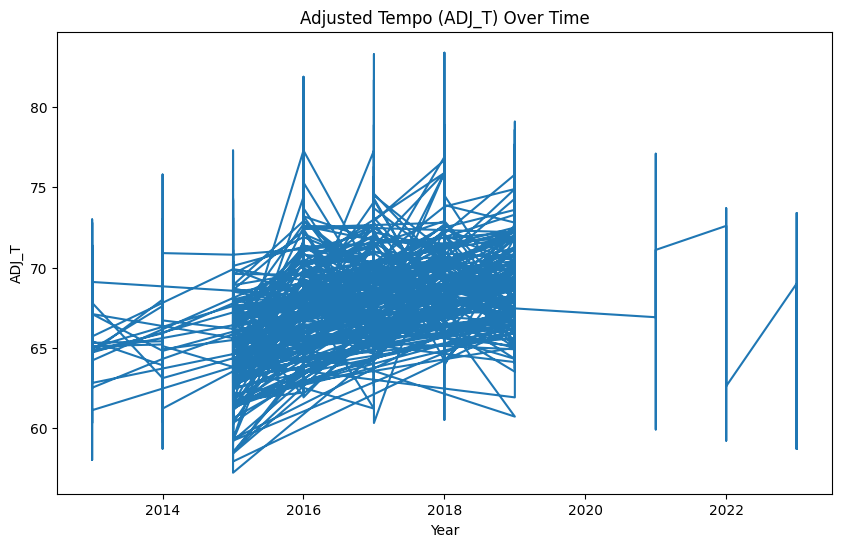

In [433]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['YEAR'], df['ADJ_T'])
plt.title('Adjusted Tempo (ADJ_T) Over Time')
plt.xlabel('Year')
plt.ylabel('ADJ_T')
plt.show()


#### It seems our year variable is NOT suitable for a time series analysis yet

In [434]:
print(df["YEAR"].describe())
print(df["YEAR"])

count    3523.000000
mean     2017.828555
std         3.257824
min      2013.000000
25%      2015.000000
50%      2018.000000
75%      2021.000000
max      2023.000000
Name: YEAR, dtype: float64
0       2016
1       2015
2       2018
3       2019
4       2017
        ... 
3518    2023
3519    2023
3520    2023
3521    2023
3522    2023
Name: YEAR, Length: 3523, dtype: int64


In [435]:
print(df['YEAR'].duplicated().sum())

3513


In [436]:
print(df.columns)

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')


In [437]:
df = df.groupby('YEAR').agg({
    'ADJ_T': 'mean',          # Adjusted Tempo: average across years
    'ADJOE': 'mean',          # Adjusted Offensive Efficiency: average across years
    'ADJDE': 'mean',          # Adjusted Defensive Efficiency: average across years
    'BARTHAG': 'mean',        # Power Rating: average across years
    'EFG_O': 'mean',          # Effective Field Goal Percentage (offensive): average
    'EFG_D': 'mean',          # Effective Field Goal Percentage (defensive): average
    'TOR': 'mean',            # Turnover Percentage Allowed: average
    'TORD': 'mean',           # Turnover Percentage Committed: average
    'ORB': 'mean',            # Offensive Rebound Rate: average
    'DRB': 'mean',            # Defensive Rebound Rate: average
    'FTR': 'mean',            # Free Throw Rate: average
    'FTRD': 'mean',           # Free Throw Rate Allowed: average
    '2P_O': 'mean',           # Two-Point Shooting Percentage (offensive): average
    '2P_D': 'mean',           # Two-Point Shooting Percentage (defensive): average
    '3P_O': 'mean',           # Three-Point Shooting Percentage (offensive): average
    '3P_D': 'mean',           # Three-Point Shooting Percentage (defensive): average
    'WAB': 'mean',            # Wins Above Bubble: average
    'TEAM': 'first',          # Team: first occurrence (the first team of each year)
    'CONF': 'first',          # Conference: first occurrence (the first conference of each year)
    'POSTSEASON': 'first',    # Postseason: first occurrence
    'SEED': 'first'           # Seed: first occurrence
}).reset_index()


In [438]:
df.describe()

,YEAR,ADJ_T,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,WAB,SEED
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2017.800000,67.736514,103.145487,103.147448,0.494064,49.884446,50.083817,18.700460,18.629023,29.315781,29.524233,34.546696,34.820403,49.106247,49.283274,34.186830,34.370801,-7.577180,2.400000
std,3.425395,1.608959,1.244210,1.242370,0.001103,0.727428,0.721175,0.552725,0.551063,1.428132,1.431720,3.111694,3.132823,0.970464,0.958441,0.503915,0.501870,0.646922,2.270585
min,2013.000000,64.936467,100.804611,100.806052,0.492494,48.536023,48.742651,18.184046,18.119943,27.668876,27.974063,30.320670,30.616480,47.460231,47.670029,33.480447,33.660894,-7.993948,1.000000
25%,2015.250000,66.730541,102.302170,102.301035,0.493152,49.555199,49.757692,18.385550,18.303775,28.278221,28.454485,31.942488,32.215911,48.509473,48.700427,33.764781,33.970398,-7.875873,1.000000
50%,2017.500000,67.786472,103.588217,103.589070,0.494231,49.945861,50.157634,18.521368,18.451642,28.832194,29.005840,34.432906,34.706695,49.491735,49.649239,34.226673,34.409214,-7.802611,1.000000
75%,2020.500000,69.151630,104.065976,104.065976,0.495066,50.369851,50.562904,18.881312,18.811475,30.551781,30.772792,36.471284,36.759053,49.878496,50.036607,34.476994,34.673860,-7.528739,3.000000
max,2023.000000,69.481766,104.584900,104.584046,0.495413,50.866667,51.062963,20.025937,19.954755,31.599424,31.815562,40.473219,40.800285,50.066667,50.233994,34.966952,35.123647,-5.816715,8.000000


In [439]:
print(df.columns)

Index(['YEAR', 'ADJ_T', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
       'WAB', 'TEAM', 'CONF', 'POSTSEASON', 'SEED'],
      dtype='object')


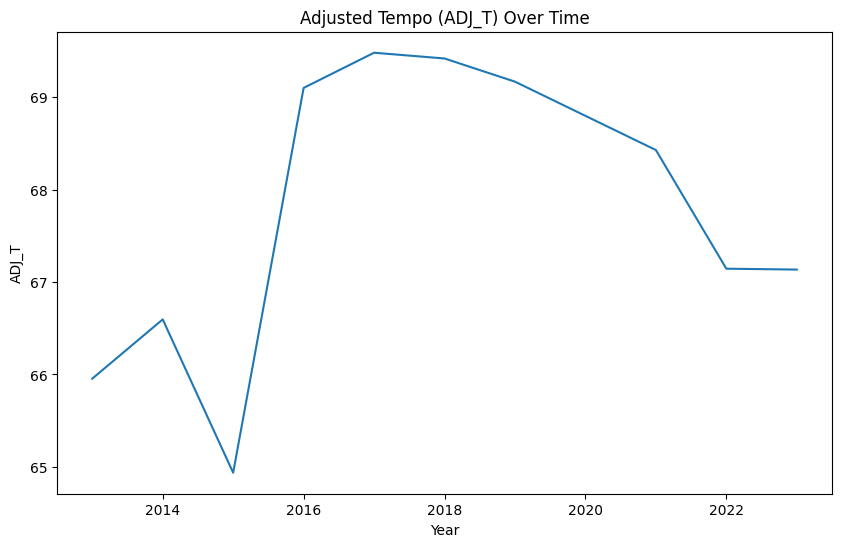

In [440]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['YEAR'], df['ADJ_T'])
plt.title('Adjusted Tempo (ADJ_T) Over Time')
plt.xlabel('Year')
plt.ylabel('ADJ_T')
plt.show()


##### This looks A LOT BETTER!

In [441]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df['ADJ_T'], autolag='AIC')
print("P-value: ", stationarity[1])

P-value:  0.5645951530760788


#### Since our data isn't stationary, we have to difference the values.

In [442]:
df['ADJ_T_diff'] = df['ADJ_T'].diff()
stationarity = adfuller(df['ADJ_T_diff'].dropna(), autolag='AIC')
print("P-value: ", stationarity[1])

P-value:  0.02442593708548695


#### It appears differencing has worked; however, we have such a little count of ADJ_T, it'll be hard to make a proper model.

In [443]:
df['ADJ_T'].count()

np.int64(10)

In [444]:
df['ADJ_T_diff'].count()

np.int64(9)

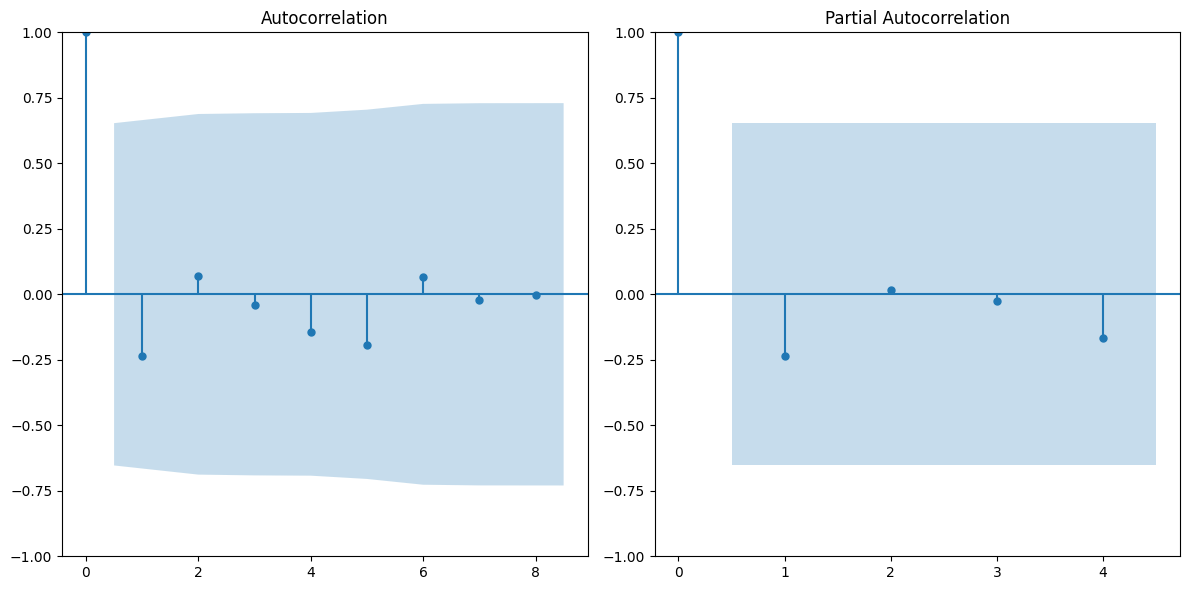

In [445]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot ACF on the first subplot
plot_acf(df['ADJ_T_diff'].dropna(), lags=8, ax=ax1)
# Plot PACF on the second subplot
plot_pacf(df['ADJ_T_diff'].dropna(), lags=4, ax=ax2)
# Show the plots
plt.tight_layout()
plt.show()

In [446]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['ADJ_T'], order=(0, 0, 0))
model_fitted = model.fit()

# Make prediction for the last period and the next n periods (e.g., 7 periods ahead)
forecast_arma = model_fitted.forecast(steps=7) 
print(forecast_arma, '\n')

# Assuming you have a DataFrame df_fit to store model diagnostics (AIC, BIC)
df_fit = pd.DataFrame(columns=['AIC', 'BIC']) 
df_fit.loc["ARIMA"] = [round(model_fitted.aic, 2), round(model_fitted.bic, 2)]
print(df_fit)


10    67.736509
11    67.736509
12    67.736509
13    67.736509
14    67.736509
15    67.736509
16    67.736509
Name: predicted_mean, dtype: float64 

         AIC    BIC
ARIMA  40.84  41.44


##### The ARIMA model we're using is producing constant, flat predictions for the entire forecast period, which indicates that the model is not capturing any meaningful patterns or trends from the data. Since we have set both the AR and MA components to 0, the model is not accounting for any past values or lagged dependencies, which means it’s essentially predicting the same value repeatedly. This lack of variability in the forecast suggests that the time series data doesn't exhibit any significant trends, seasonality, or autocorrelation that the model can use to generate more accurate or dynamic predictions.

##### Additionally, the AIC and BIC values, though relatively low, do not reflect any improvements in model performance, which indicates that the model isn't providing any real predictive value. When the forecast remains static despite efforts to fit a time series model, it suggests that the underlying data may not have enough structure or meaningful patterns to model effectively. In this case, the ARIMA model is failing to offer insights that could help in making future predictions or understanding the underlying processes governing the time series.

##### In summary, the ARIMA model is ineffective in this case because it fails to capture any meaningful patterns or variations in the data, resulting in flat and unhelpful predictions.

##### A proper time series analysis on the dataset becomes challenging due to the way the data has been adjusted. Many of the variables, like **ADJ_T**, **ADJOE**, and **EFG_O/D**, provide aggregate or adjusted metrics, which account for factors like opponent strength, pace, and various other influences. While these adjustments are helpful for comparing overall team performance across different seasons, they can obscure underlying trends specific to a team or conference. For example, it's difficult to assess whether teams have been improving their **three-point shooting percentage** (**3P_O**) over time without data on **3P attempts**. 

##### Without the ability to separate raw shooting attempts from efficiency metrics, it becomes nearly impossible to distinguish if teams are improving their shooting accuracy or if they are simply attempting fewer shots. Similarly, focusing on adjusted statistics like **EFG_O** can mask whether a team's actual strategy has shifted over time. Without access to more granular data on individual teams or conferences, spotting true trends or patterns—like the rise in three-point shooting or changes in defensive schemes—becomes much more difficult. The aggregated data removes the detail that would allow for more targeted analysis, making it harder to identify meaningful shifts or improvements in team strategies.